In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style as style
style.use("ggplot")
import missingno as ms
import warnings
warnings.filterwarnings("ignore")

In [3]:
#inserting train and test data datasets
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")



In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#observation: 891 rows and 12 columns
 #   Age column has 714 nan or missing values
  #  Cabin column has 204 nan or missing values

In [8]:
#description of dataset in 5 point summary (min, 25%, 50%, 75%, max)
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#checking of duplications of data values
train_df.duplicated().sum()

0

In [10]:
#checking for missing values
m_val = train_df.isnull().sum().sort_values(ascending = False)
m_val.head()

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [11]:
#perentage of missing valuyesfor each feature
mval_per = train_df.isnull().sum()/train_df.isnull().count()*100

null_df = pd.DataFrame({"missing values": m_val,"Percentage": mval_per.sort_values(ascending = False)})

null_df.head()

,missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


Text(0.5, 1.0, 'Bar plot showing missing data values')

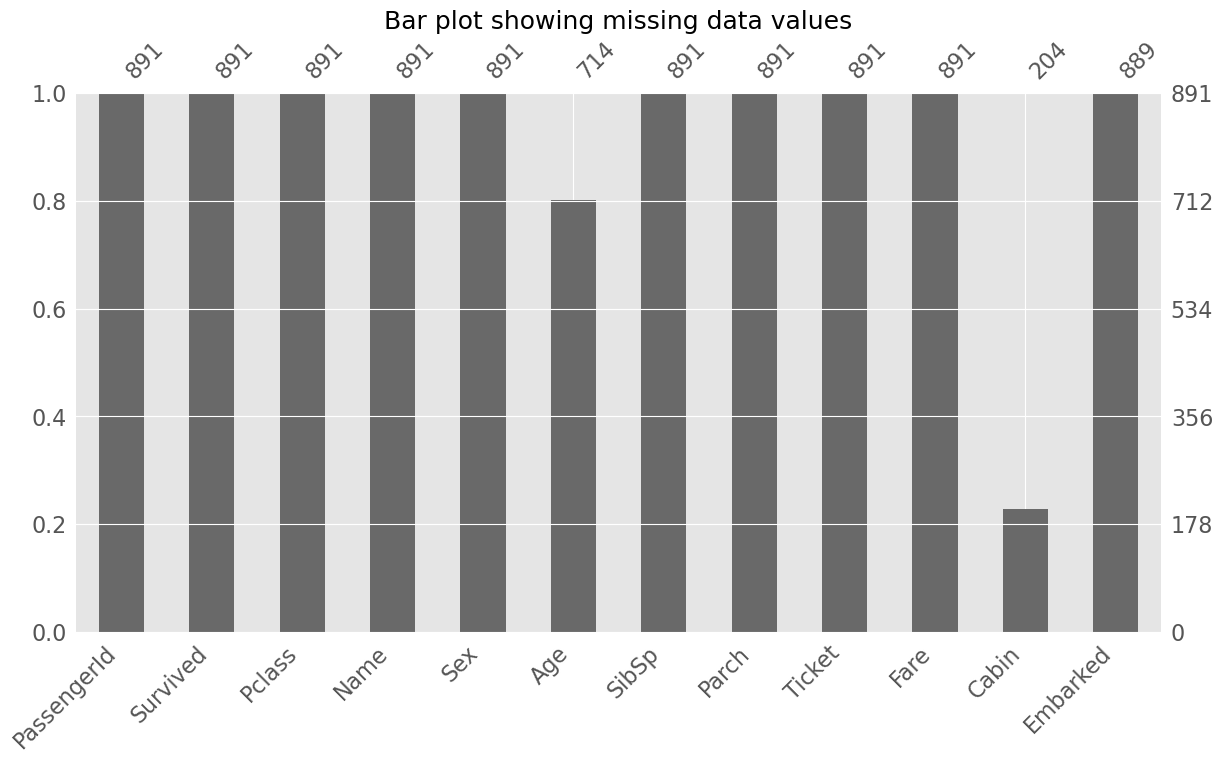

In [12]:
ms.bar(train_df,figsize = (14,7))
plt.title("Bar plot showing missing data values", size = 18)

In [13]:
#replacing missing values with mean values
#comparing by plotting curves for initialvalues with replaced mean values
train_df["Age_mean"] = train_df["Age"].fillna(train_df["Age"].mean())

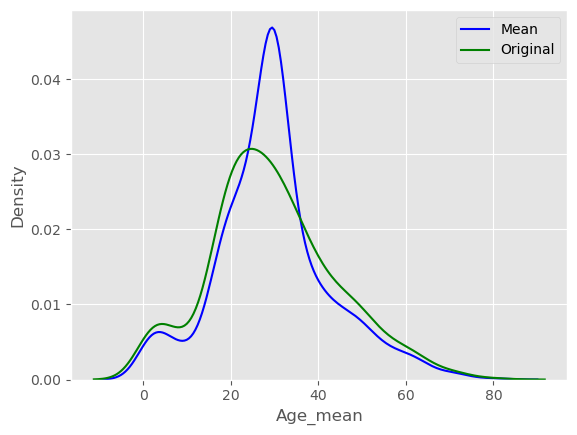

In [14]:
#Difference in curves between replaced and original values
sns.kdeplot(train_df["Age_mean"],color = "blue",label = "Mean")
sns.kdeplot(train_df["Age"],color= "green",label = "Original")
plt.legend()

In [15]:
#observation: filling up missing values does change the curve

In [16]:
#replacing them with mean values
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())



train_df["Age"].isnull().sum()
test_df["Age"].isnull().sum()

0

In [17]:
#Dropping unnecessary columns
train_df.drop(["Cabin","Name","Ticket", "Fare", "PassengerId"],axis = 1, inplace = True)
test_df.drop(["Cabin","Name","Ticket", "Fare", "PassengerId"],axis = 1, inplace = True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_mean
0,0,3,male,22.0,1,0,S,22.0
1,1,1,female,38.0,1,0,C,38.0
2,1,3,female,26.0,0,0,S,26.0
3,1,1,female,35.0,1,0,S,35.0
4,0,3,male,35.0,0,0,S,35.0


In [18]:
#Analysis 
pd.DataFrame({" ":["Not Survived","Survived"],
              "value counts": train_df["Survived"].value_counts(),
              "Percentage(%)":[(train_df["Survived"]==0).sum()*100/len(train_df), 
                               (train_df["Survived"]==1).sum()*100/len(train_df)]}).set_index(" ").head()

,value counts,Percentage(%)
,,
Not Survived,549,61.616162
Survived,342,38.383838


In [19]:
import matplotlib.pyplot as plt

def bar_graph(field):
    feature = train_df[field]
    feature_val = feature.value_counts()

    plt.figure(figsize=(9,5))
    plt.bar(feature_val.index, feature_val, color="green")
    plt.title(field)
    plt.xticks(feature_val.index, feature_val.index.values)
    plt.ylabel("count")
    plt.show()
    print("{}\n{}".format(field, feature_val))

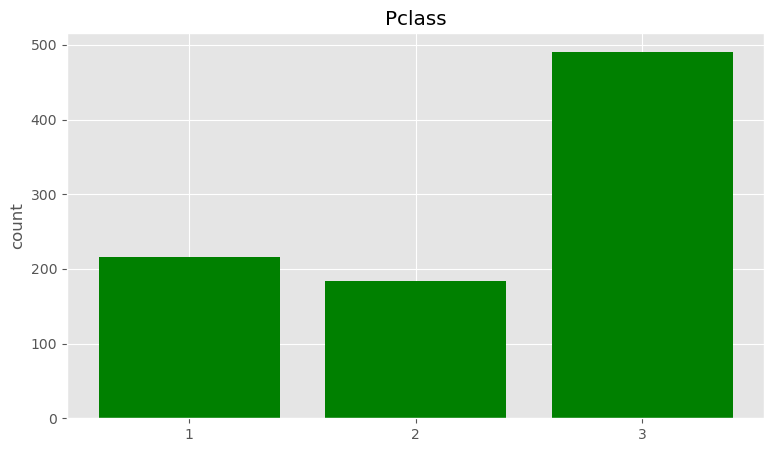

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64


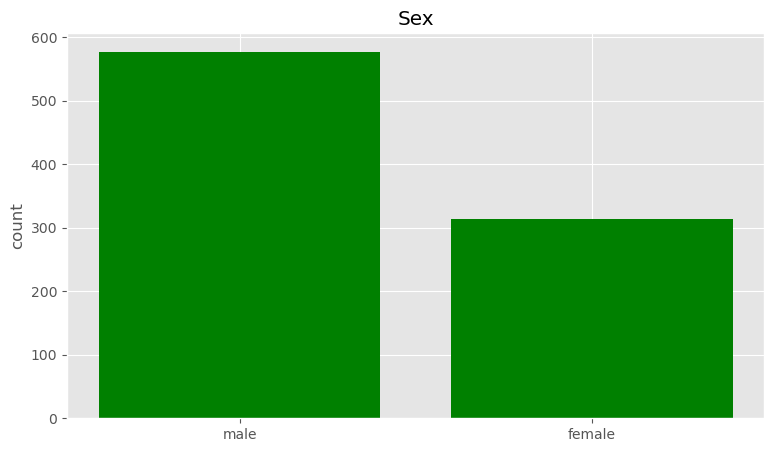

Sex
male      577
female    314
Name: Sex, dtype: int64


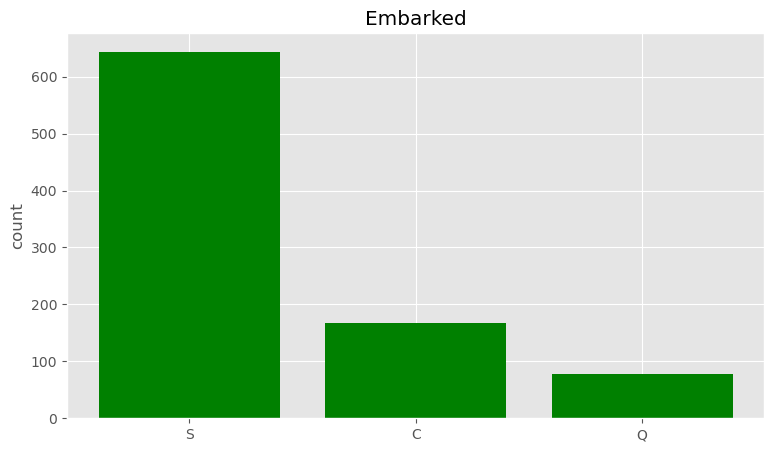

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64


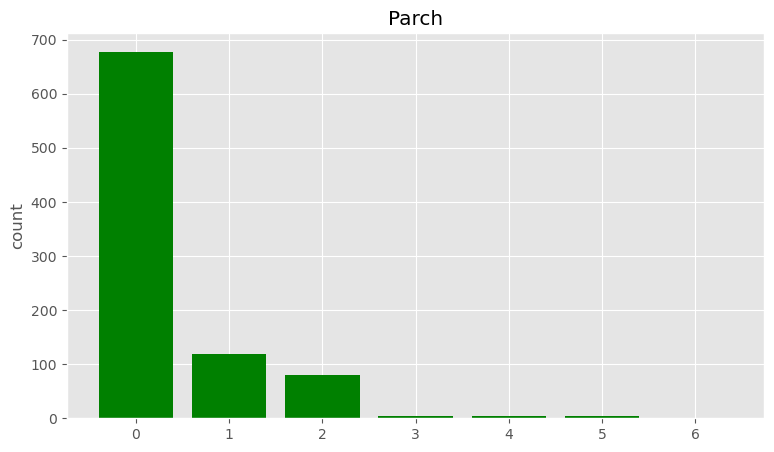

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


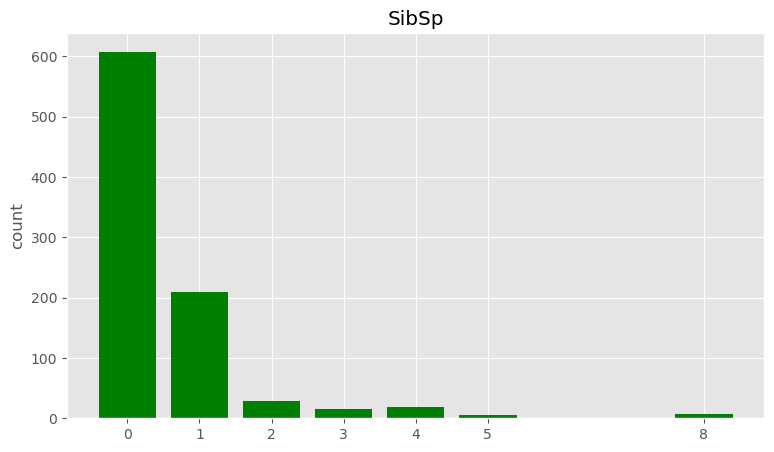

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [20]:
cols = ["Pclass","Sex" ,"Embarked","Parch","SibSp"]
for i in cols:
    bar_graph(i)

In [21]:
#observation: from the bar plots we see that in Pclass from third class more people died 
#as compared to other class also find other columns showing more people died

In [22]:
#CROSS TABLE
pd.crosstab(train_df["Survived"],train_df["Pclass"],margins=True,margins_name="Total")

Pclass,1,2,3,Total
Survived,,,,
0,80,97,372,549
1,136,87,119,342
Total,216,184,491,891


In [23]:
#observatiuon : we can see passengers from third class died more as compared to other classes

In [24]:
pd.crosstab(train_df["Survived"],train_df["Sex"],margins=True,margins_name="Total")

Sex,female,male,Total
Survived,,,
0,81,468,549
1,233,109,342
Total,314,577,891


In [25]:
#observation :we can see female survived more than male.

In [26]:
pd.crosstab(train_df["Survived"],train_df["SibSp"],margins=True,margins_name="Total")

SibSp,0,1,2,3,4,5,8,Total
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
Total,608,209,28,16,18,5,7,891


In [27]:
#observation people with no sibling and spouse died more than others.

In [28]:
#pivot Table

In [29]:
pivot = train_df.pivot_table("Survived",index = ["Embarked","Pclass","SibSp"], columns = "Sex")
pivot

Sex                      female      male
Embarked Pclass SibSp                    
C        1      0      0.956522  0.343750
                1      1.000000  0.600000
                2      1.000000       NaN
         2      0      1.000000  0.400000
                1      1.000000  0.000000
         3      0      0.692308  0.176471
                1      0.428571  0.500000
                2      1.000000  0.000000
Q        1      1      1.000000       NaN
                2           NaN  0.000000
         2      0      1.000000  0.000000
         3      0      0.703704  0.068966
                1      0.800000  0.000000
                2      1.000000  1.000000
                4           NaN  0.000000
S        1      0      1.000000  0.321429
                1      0.904762  0.428571
                2      1.000000  1.000000
                3      1.000000  0.000000
         2      0      0.925000  0.100000
                1      0.869565  0.318182
                2      1.000000  0.200000
                3      1.000000       NaN
         3      0      0.487805  0.130435
                1      0.384615  0.187500
                2      0.000000  0.000000
                3      0.125000  0.000000
                4      0.333333  0.125000
                5      0.000000  0.000000
                8      0.000000  0.000000

In [30]:
#observation : We can see detailed vview of value counts

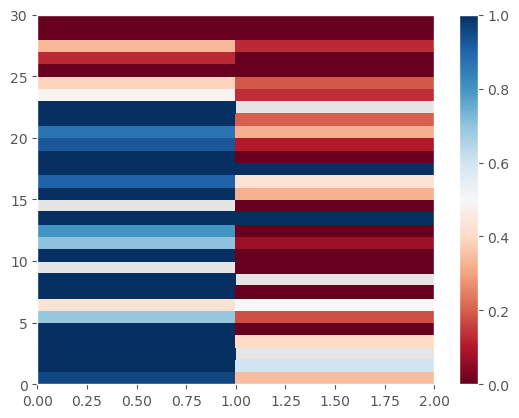

In [31]:
#visualization of target variable over multiple variables using heat map

plt.pcolor(pivot, cmap="RdBu")
plt.colorbar()
plt.show()

In [32]:
#Data Prepration for fitting a model


In [33]:
from sklearn.model_selection import train_test_split #splitting dataset into train & test
from sklearn.preprocessing import StandardScaler     #to Scale data Values
from sklearn.preprocessing import LabelEncoder       #converting categorical variables into numerical


In [34]:
Lben = LabelEncoder()

train_df["Sex"] = Lben.fit_transform(train_df["Sex"].sort_values())
train_df["Embarked"] = Lben.fit_transform(train_df["Embarked"].astype(str).values)

test_df["Sex"] = Lben.fit_transform(test_df["Sex"].sort_values())
test_df["Embarked"] = Lben.fit_transform(test_df["Embarked"].astype(str).values)

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_mean
0,0,3,0,22.0,1,0,2,22.0
1,1,1,0,38.0,1,0,0,38.0
2,1,3,0,26.0,0,0,2,26.0
3,1,1,0,35.0,1,0,2,35.0
4,0,3,0,35.0,0,0,2,35.0


In [36]:
#setting our values for target variable

In [37]:
x_train = train_df.iloc[:,1:7]
y_train = train_df.loc[:, "Survived"]
x_test  = test_df

In [38]:
sc_object = StandardScaler()
x_train = sc_object.fit_transform(x_train)
x_test = sc_object.transform(x_test)

In [39]:
#libraries for differentt machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn .naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [40]:
#Logistic Regression Model
l_regression = LogisticRegression()
l_regression.fit(x_train, y_train)
lreg_score = round(l_regression.score(x_train,y_train)*100,2)
print(lreg_score)

71.6


In [41]:
#Decision Tree Classifier
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
dtree_score = round(d_tree.score(x_train,y_train)*100,2)
print(dtree_score)

89.79


In [42]:
#Random Forest Model
r_forest = RandomForestClassifier()
r_forest.fit(x_train, y_train)
rf_score = round(r_forest.score(x_train, y_train)*100,2)
print(rf_score)

89.79


In [43]:
#SVC
svc = SVC(kernel = "rbf", random_state = 0)
svc.fit(x_train, y_train)
svc_score = round(svc.score(x_train, y_train)*100,2)
print(svc_score)

74.86


In [44]:
#GAUSSIAN NB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_score = round(nb.score(x_train, y_train)*100,2)
print(nb_score)

67.45


In [45]:
#K nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3,metric = "minkowski",p=2)
knn.fit(x_train, y_train)
knn_score = round(knn.score(x_train, y_train)*100,2)
print(knn_score)

79.46


In [46]:
selection = pd.DataFrame({"Models":["Logistic","DecisionTree", "RandomForest","SVC", "GaussianNB", "KNN"],"Accuracy_values":[lreg_score ,dtree_score ,rf_score,svc_score,nb_score,knn_score]})
selection.sort_values(by ="Accuracy_values", ascending = False)

,Models,Accuracy_values
1,DecisionTree,89.79
2,RandomForest,89.79
5,KNN,79.46
3,SVC,74.86
0,Logistic,71.60
4,GaussianNB,67.45


In [47]:
#Prediction with Random Forest Model
#using test values
final_prediction = r_forest.predict(x_test)


In [48]:
#putting prediction into dataframe
output_df = pd.DataFrame({"Survived": final_prediction})
output_df.head(10)

,Survived
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0
